## EDA of Datasets

https://steinhardt.nyu.edu/research-alliance/research/spotlight-nyc-schools/how-have-nycs-high-school-graduation-and-college

https://www.the74million.org/article/adams-covid-19-learning-loss-will-be-devastating-for-nyc-students-but-the-school-system-will-come-out-looking-just-fine/

https://ny.chalkbeat.org/2021/1/14/22230843/nyc-graduation-rates-up-2020


In [1]:
import os
import ssl
import sys
import urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in Datasets

In [2]:
grads = pd.read_csv('data/clean/all_grad_rates.csv', )
sqr = pd.read_csv('data/clean/sqr.csv')
lcgms = pd.read_csv('data/clean/lcgms.csv')
demo = pd.read_csv('data/clean/demo.csv')

In [3]:
lcgms.groupby(['type', 'desc']).count()

zip  boroughBlockLot  \
type              desc                                                    
Career Technical  High school                       46               46   
General Academic  District Pre-K Center             18               18   
                  Early Childhood                   12               12   
                  Elementary                       728              727   
                  High school                      313              313   
                  Junior High-Intermediate-Middle  289              289   
                  K-12 all grades                   34               34   
                  K-8                              216              216   
                  Secondary School                  93               93   
Home School       K-12 all grades                    1                1   
Special Education Elementary                         2                2   
                  High school                        9                9   
                  K-12 all grades                   30               30   
                  K-8                               13               13   
                  Secondary School                   7                7   
                  Ungraded                           2                2   
Transfer School   High school                       58               58   

                                                   censusTract  geoDis  dbn  
type              desc                                                       
Career Technical  High school                               46      46   46  
General Academic  District Pre-K Center                     18      18   18  
                  Early Childhood                           12      12   12  
                  Elementary                               727     728  728  
                  High school                              313     313  313  
                  Junior High-Intermediate-Middle          289     289  289  
                  K-12 all grades                           34      34   34  
                  K-8                                      216     216  216  
                  Secondary School                          93      93   93  
Home School       K-12 all grades                            1       1    1  
Special Education Elementary                                 2       2    2  
                  High school                                9       9    9  
                  K-12 all grades                           29      30   30  
                  K-8                                       13      13   13  
                  Secondary School                           7       7    7  
                  Ungraded                                   2       2    2  
Transfer School   High school                               58      58   58

#### EDA Grads Data

In [4]:
grads = grads.merge(lcgms, right_on = 'dbn', left_on='dbn')

In [5]:
grads['sqrYear'] = grads['cohortYear']+4
grads = grads[grads['cohort'] == '4 year August']
grads['adminDis'] = grads['dbn'].str[:2]

In [6]:
grads.head()

,dbn,schoolName,cohortYear,cohort,totalCohortNum,gradsNum,dropoutNum,stillEnrolledNum,type,desc,zip,boroughBlockLot,censusTract,geoDis,sqrYear,adminDis
0,01M292,ORCHARD COLLEGIATE ACADEMY,2016,4 year August,31,29.0,1.0,1.0,General Academic,High school,10002,1.002690e+09,201.0,1,2020,01
1,01M292,ORCHARD COLLEGIATE ACADEMY,2015,4 year August,28,25.0,3.0,0.0,General Academic,High school,10002,1.002690e+09,201.0,1,2019,01
2,01M292,ORCHARD COLLEGIATE ACADEMY,2014,4 year August,29,28.0,1.0,0.0,General Academic,High school,10002,1.002690e+09,201.0,1,2018,01
3,01M292,ORCHARD COLLEGIATE ACADEMY,2013,4 year August,36,25.0,7.0,3.0,General Academic,High school,10002,1.002690e+09,201.0,1,2017,01
4,01M292,ORCHARD COLLEGIATE ACADEMY,2012,4 year August,44,24.0,10.0,10.0,General Academic,High school,10002,1.002690e+09,201.0,1,2016,01


In [7]:
grads.groupby(['cohortYear']).describe()['gradsNum']

,count,mean,std,min,25%,50%,75%,max
cohortYear,,,,,,,,
2005,301.0,140.059801,177.601078,0.0,57.00,73.0,114.00,959.0
2006,320.0,140.878125,182.554172,0.0,53.75,73.5,118.00,1043.0
2007,350.0,135.440000,179.641989,0.0,51.00,73.0,113.50,1100.0
2008,376.0,129.470745,172.576211,0.0,51.00,70.0,107.00,1210.0
2009,408.0,122.676471,171.664430,0.0,46.75,68.0,103.00,1271.0
2010,429.0,118.557110,162.255062,0.0,48.00,68.0,100.00,1271.0
2011,450.0,116.646667,154.017403,0.0,51.00,72.0,103.00,1295.0
2012,474.0,116.310127,156.201836,0.0,51.00,71.0,107.00,1340.0
2013,497.0,113.549296,152.436244,3.0,51.00,73.0,100.00,1292.0


In [8]:
grads.groupby(['type', 'desc']).count()

dbn  schoolName  \
type              desc                                                
Career Technical  High school                       392         392   
General Academic  High school                      3322        3322   
                  Junior High-Intermediate-Middle     9           9   
                  K-12 all grades                   177         177   
                  K-8                                11          11   
                  Secondary School                  806         806   
Special Education High school                        12          12   
                  Ungraded                            4           4   
Transfer School   High school                       594         594   

                                                   cohortYear  cohort  \
type              desc                                                  
Career Technical  High school                             392     392   
General Academic  High school                            3322    3322   
                  Junior High-Intermediate-Middle           9       9   
                  K-12 all grades                         177     177   
                  K-8                                      11      11   
                  Secondary School                        806     806   
Special Education High school                              12      12   
                  Ungraded                                  4       4   
Transfer School   High school                             594     594   

                                                   totalCohortNum  gradsNum  \
type              desc                                                        
Career Technical  High school                                 392       370   
General Academic  High school                                3322      3229   
                  Junior High-Intermediate-Middle               9         6   
                  K-12 all grades                             177       166   
                  K-8                                          11        10   
                  Secondary School                            806       774   
Special Education High school                                  12        12   
                  Ungraded                                      4         0   
Transfer School   High school                                 594       588   

                                                   dropoutNum  \
type              desc                                          
Career Technical  High school                             370   
General Academic  High school                            3229   
                  Junior High-Intermediate-Middle           6   
                  K-12 all grades                         166   
                  K-8                                      10   
                  Secondary School                        774   
Special Education High school                              12   
                  Ungraded                                  0   
Transfer School   High school                             588   

                                                   stillEnrolledNum   zip  \
type              desc                                                      
Career Technical  High school                                   370   392   
General Academic  High school                                  3229  3322   
                  Junior High-Intermediate-Middle                 6     9   
                  K-12 all grades                               166   177   
                  K-8                                            10    11   
                  Secondary School                              774   806   
Special Education High school                                    12    12   
                  Ungraded                                        0     4   
Transfer School   High school                                   588   594   

                                

In [9]:
overall_rates = grads.groupby(['cohortYear'])['gradsNum'].agg('sum')/grads.groupby(['cohortYear'])['totalCohortNum'].agg('sum')
city_grad_rates = grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['gradsNum'].agg('sum')/grads[(grads['adminDis'] != '84')].groupby(['cohortYear'])['totalCohortNum'].agg('sum')
charter_grad_rates = grads[(grads['adminDis'] == '84')].groupby(['cohortYear'])['gradsNum'].agg('sum')/grads[(grads['adminDis'] == '84')].groupby(['cohortYear'])['totalCohortNum'].agg('sum')

In [10]:
grad_rates = pd.DataFrame({'District': city_grad_rates, 'Charter':charter_grad_rates, 'Overall':overall_rates})

In [11]:
grad_rates

,District,Charter,Overall
cohortYear,,,
2005,0.696010,NaN,0.696010
2006,0.716015,NaN,0.716015
2007,0.710426,0.537445,0.708665
2008,0.707911,0.628731,0.706679
2009,0.701457,0.657068,0.700508
2010,0.722039,0.651294,0.720258
2011,0.737596,0.663203,0.735189
2012,0.761296,0.714588,0.759474
2013,0.772940,0.754094,0.772011


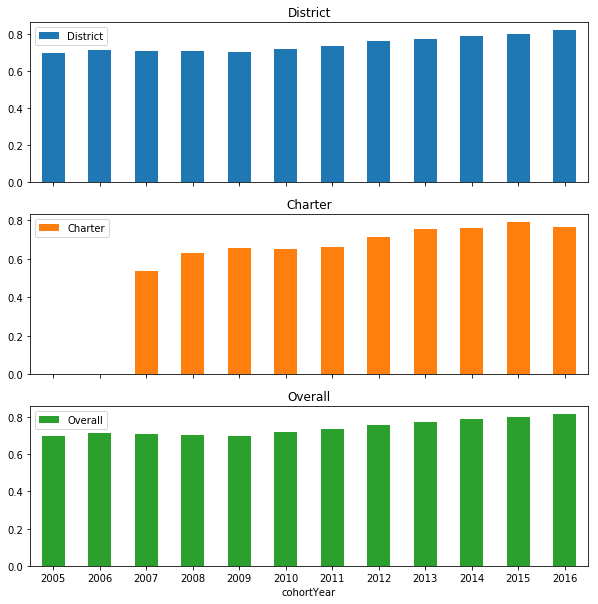

In [12]:
axes = grad_rates.plot.bar(rot=0, subplots=True, figsize = (10,10))

In [13]:
grad_rates_stacked = grad_rates.stack().reset_index().rename(columns={'cohortYear':'Cohort Year','level_1':'Grouping', 0:'Grad Rates'}).sort_values(by=['Grouping'])
grad_rates_stacked['Grad Rates'] = round(pd.to_numeric(grad_rates_stacked['Grad Rates'])*100,2)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


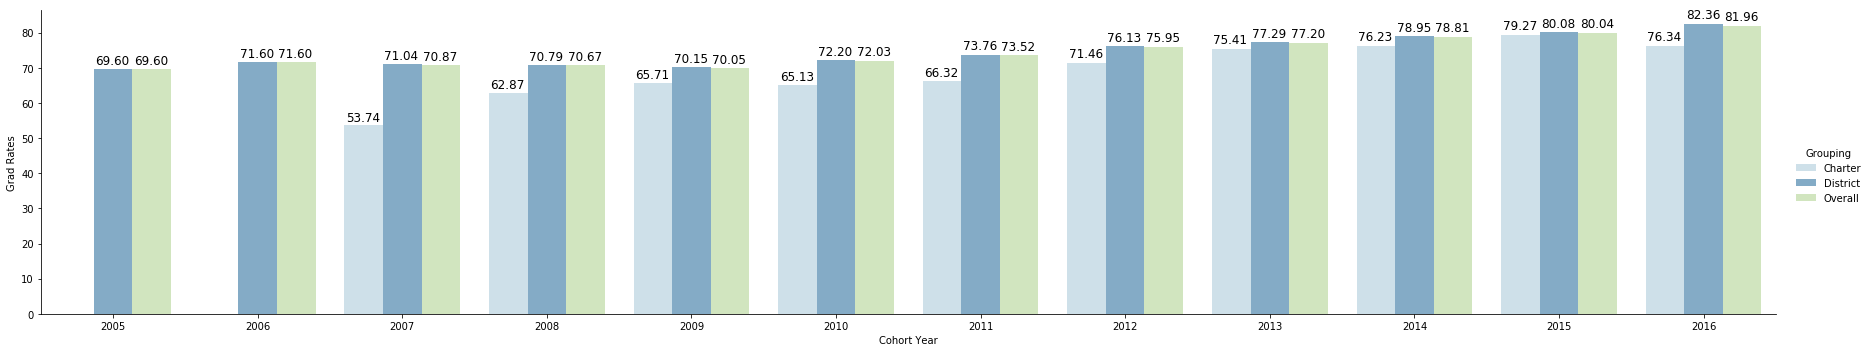

In [14]:
g = sns.catplot(
    data = grad_rates_stacked, kind="bar", 
    x="Cohort Year", y='Grad Rates', hue="Grouping",
    palette="Paired", alpha=.6, height =5, aspect = 5)
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01,
            p.get_height() * 1.02, 
           '{0:.2f}'.format(p.get_height()),
           color='black', rotation='horizontal', size=12)

In [15]:
geo_dis_rates = pd.DataFrame(round(grads.groupby(['cohortYear', 'geoDis'])['gradsNum'].agg('sum')/grads.groupby(['cohortYear', 'geoDis'])['totalCohortNum'].agg('sum')*100,2), 
                             columns=['Grad Rates'])
geo_dis_rates = geo_dis_rates.reset_index().rename(columns = {'cohortYear': 'Cohort Year', 'geoDis':'Geo District'})

In [16]:
geo_dis_rates.pivot(index='Geo District', columns='Cohort Year', values='Grad Rates')

Cohort Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geo District,,,,,,,,,,,,
1,64.86,67.33,63.99,63.91,58.32,55.49,62.92,63.30,63.74,68.87,70.25,70.58
2,72.96,73.98,73.31,73.30,72.93,74.61,75.95,78.44,77.14,79.47,80.62,82.47
3,76.57,76.71,70.76,68.86,66.92,73.83,74.23,75.56,77.83,76.67,79.55,82.41
4,79.51,82.28,85.63,87.84,86.73,86.85,87.15,87.91,89.04,90.19,91.84,87.64
5,70.55,70.32,76.12,73.99,74.24,73.77,73.40,76.38,78.19,77.21,77.57,81.33
6,79.46,76.21,73.99,70.06,66.58,70.28,71.10,72.65,71.98,79.23,79.86,81.89
7,63.00,68.16,64.19,63.27,59.06,62.68,64.69,68.55,67.28,68.28,72.38,73.54
8,47.34,53.00,57.11,45.49,48.15,53.34,53.72,60.02,60.74,63.40,64.28,68.34
9,75.20,73.11,69.50,70.41,68.60,68.54,71.88,74.18,76.12,74.84,76.57,80.46


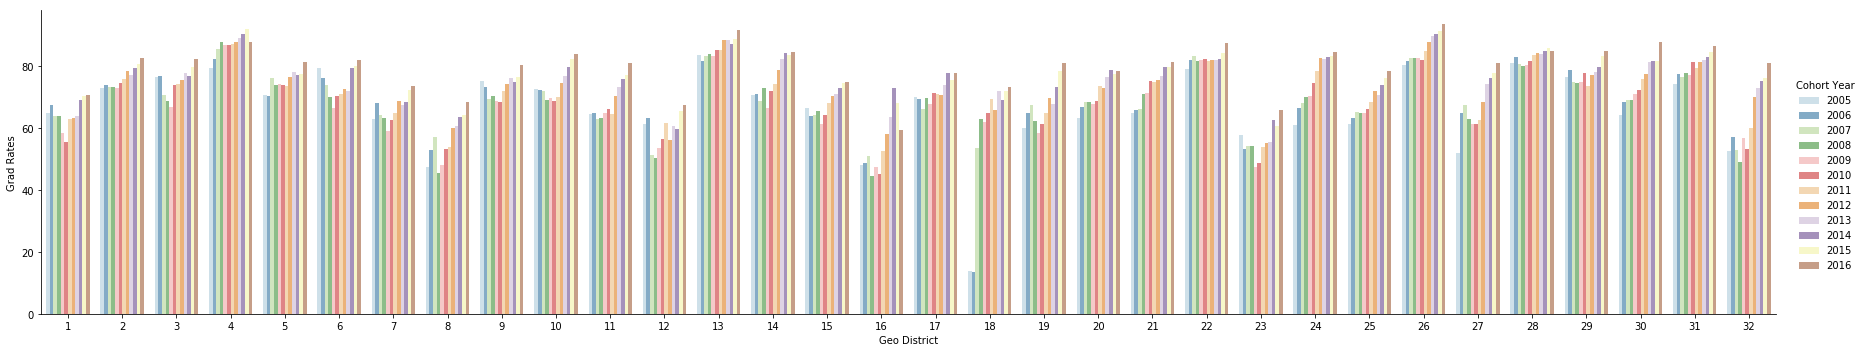

In [17]:
g = sns.catplot(
    data = geo_dis_rates, kind="bar", 
    x="Geo District", y='Grad Rates', hue="Cohort Year",
    palette="Paired", alpha=.6, height =5, aspect = 5)

/Users/mguan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


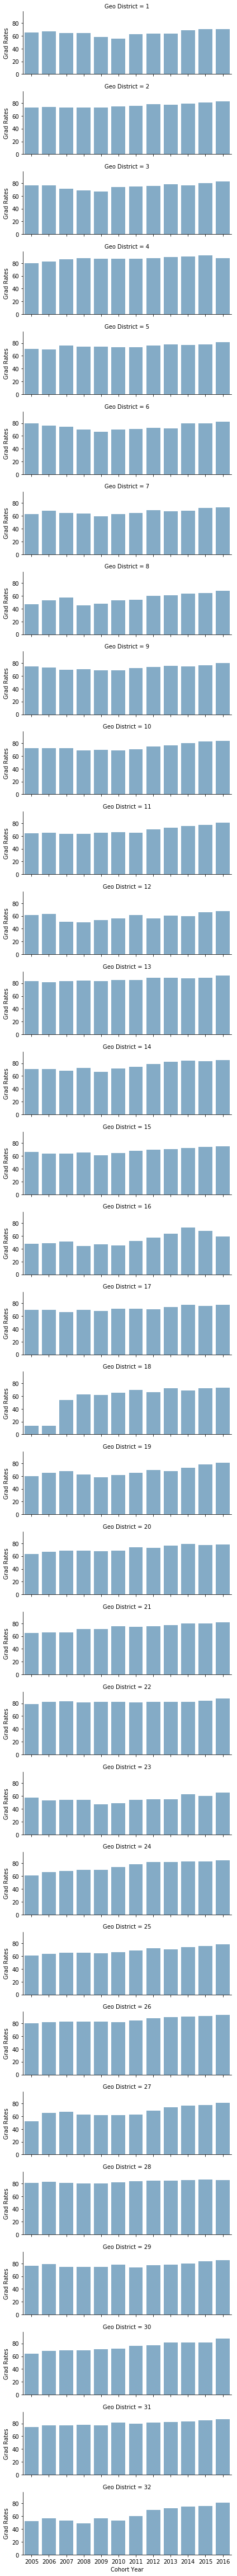

In [18]:
g = sns.FacetGrid(data=geo_dis_rates, row="Geo District", height=2, aspect = 3)
g.map(sns.barplot, 'Cohort Year', 'Grad Rates', alpha=.6)

#### EDA Demographics Data

In [19]:
demo.columns

Index(['dbn', 'enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'female',
       'pctFemale', 'male', 'pctMale', 'asian', 'pctAsian', 'black',
       'pctBlack', 'hispanic', 'pctHispanic', 'white', 'pctWhite', 'swd',
       'pctSwd', 'ell', 'pctEll', 'poverty', 'pctPoverty', 'econNeedInd',
       'sqrYear'],
      dtype='object')

In [52]:
demoCols = ['enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'female', 'male', 'asian', 'black',
            'hispanic', 'white',  'swd', 'ell', 'poverty', 'econNeedInd']
demoLong = pd.DataFrame()
for c in demoCols:
    temp = demo[['dbn', 'sqrYear', c]]
    temp['metric']=c
    temp.rename(columns={c:'values'}, inplace=True)
    demoLong = pd.concat([demoLong, temp], axis=0)

demoLong.head()

/Users/mguan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dbn,sqrYear,values,metric
0,01M015,2016,176,enrollment
1,01M015,2017,178,enrollment
2,01M015,2018,190,enrollment
3,01M015,2019,174,enrollment
4,01M015,2020,190,enrollment


In [48]:
dt = grads.merge(demo, right_on = ['dbn','sqrYear'], left_on=['dbn','sqrYear'])

In [49]:
dt.columns

Index(['dbn', 'schoolName', 'cohortYear', 'cohort', 'totalCohortNum',
       'gradsNum', 'dropoutNum', 'stillEnrolledNum', 'type', 'desc', 'zip',
       'boroughBlockLot', 'censusTract', 'geoDis', 'sqrYear', 'adminDis',
       'enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'numFemale', 'pctFemale',
       'numMale', 'pctMale', 'numAsian', 'pctAsian', 'numBlack', 'pctBlack',
       'numHispanic', 'pctHispanic', 'numWhite', 'pctWhite', 'numSwd',
       'pctSwd', 'numEll', 'pctEll', 'numPoverty', 'pctPoverty',
       'econNeedInd'],
      dtype='object')

In [62]:
asian = pd.DataFrame({'Overall':dt.groupby(['sqrYear'])['numAsian'].agg('sum')/dt.groupby(['sqrYear'])['enrollment'].agg('sum'),
                      'District':dt[dt.adminDis != '84'].groupby(['sqrYear'])['numAsian'].agg('sum')/dt[dt.adminDis != '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                      'Charter':dt[dt.adminDis == '84'].groupby(['sqrYear'])['numAsian'].agg('sum')/dt[dt.adminDis == '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                     'Ethnicity':'Asian'})
black = pd.DataFrame({'Overall':dt.groupby(['sqrYear'])['numBlack'].agg('sum')/dt.groupby(['sqrYear'])['enrollment'].agg('sum'),
                      'District':dt[dt.adminDis != '84'].groupby(['sqrYear'])['numBlack'].agg('sum')/dt[dt.adminDis != '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                      'Charter':dt[dt.adminDis == '84'].groupby(['sqrYear'])['numBlack'].agg('sum')/dt[dt.adminDis == '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                     'Ethnicity':'Black'})
hispanic = pd.DataFrame({'Overall':dt.groupby(['sqrYear'])['numHispanic'].agg('sum')/dt.groupby(['sqrYear'])['enrollment'].agg('sum'),
                      'District':dt[dt.adminDis != '84'].groupby(['sqrYear'])['numHispanic'].agg('sum')/dt[dt.adminDis != '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                      'Charter':dt[dt.adminDis == '84'].groupby(['sqrYear'])['numHispanic'].agg('sum')/dt[dt.adminDis == '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                     'Ethnicity':'Hispanic'})
white = pd.DataFrame({'Overall':dt.groupby(['sqrYear'])['numWhite'].agg('sum')/dt.groupby(['sqrYear'])['enrollment'].agg('sum'),
                      'District':dt[dt.adminDis != '84'].groupby(['sqrYear'])['numWhite'].agg('sum')/dt[dt.adminDis != '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                      'Charter':dt[dt.adminDis == '84'].groupby(['sqrYear'])['numWhite'].agg('sum')/dt[dt.adminDis == '84'].groupby(['sqrYear'])['enrollment'].agg('sum'), 
                     'Ethnicity':'White'})
pd.concat([asian,black,hispanic,white])

,Overall,District,Charter,Ethnicity
sqrYear,,,,
2016,0.156286,0.169144,0.013732,Asian
2017,0.156047,0.171160,0.015812,Asian
2018,0.155864,0.173111,0.015850,Asian
2019,0.155775,0.174340,0.015997,Asian
2020,0.156300,0.176316,0.016638,Asian
2016,0.297146,0.275749,0.534366,Black
2017,0.293727,0.268367,0.529049,Black
2018,0.290293,0.260930,0.528659,Black
2019,0.287846,0.254076,0.542100,Black


#### EDA SQR 

In [89]:
sqr.columns

Index(['dbn', 'enrollment', 'pctAsian', 'pctBlack', 'pctHispanic', 'pctWhite',
       'pctEll', 'pctSwd', 'pctSelfContained', 'econNeed', 'grd8Ela',
       'grd8Math', 'attdRate', 'pctChronAbs', 'sqrYear', 'pct10PlusYear1',
       'pct10PlusYear1Lowest3rd', 'pct10PlusYear2', 'pct10PlusYear2Lowest3rd',
       'pct10PlusYear3', 'pct10PlusYear3Lowest3rd', 'num10PlusYear1',
       'num10PlusYear1Lowest3rd', 'num10PlusYear2', 'num10PlusYear2Lowest3rd',
       'num10PlusYear3', 'num10PlusYear3Lowest3rd'],
      dtype='object')

In [13]:
demo.merge(sqr, right_on = ['sqrYear', 'dbn'], left_on = ['sqrYear', 'dbn'] )[['dbn', 'sqrYear', 'pctAsian_x', 'pctAsian_y']]

,dbn,sqrYear,pctAsian_x,pctAsian_y
0,01M292,2016,0.118919,0.131
1,01M292,2017,0.150000,0.150
2,01M292,2018,0.111111,0.117
3,01M292,2019,0.096447,0.096
4,01M292,2020,0.119469,0.115
5,01M448,2016,0.279883,0.280
6,01M448,2017,0.303571,0.301
7,01M448,2018,0.303226,0.303
8,01M448,2019,0.368530,0.369
9,01M448,2020,0.380081,0.374


In [4]:
df = grads.merge(sqr, right_on = ['sqrYear', 'dbn'], left_on = ['sqrYear', 'dbn'])

In [5]:
df = df.merge(lcgms, right_on = ['dbn'], left_on = ['dbn'])

In [6]:
df.columns

Index(['dbn', 'schoolName', 'cohortYear', 'cohort', 'totalCohortNum',
       'gradsNum', 'dropoutNum', 'stillEnrolledNum', 'sqrYear', 'enrollment',
       'pctAsian', 'pctBlack', 'pctHispanic', 'pctWhite', 'pctEll', 'pctSwd',
       'pctSelfContained', 'econNeed', 'grd8Ela', 'grd8Math', 'attdRate',
       'pctChronAbs', 'pct10PlusYear1', 'pct10PlusYear1Lowest3rd',
       'pct10PlusYear2', 'pct10PlusYear2Lowest3rd', 'pct10PlusYear3',
       'pct10PlusYear3Lowest3rd', 'num10PlusYear1', 'num10PlusYear1Lowest3rd',
       'num10PlusYear2', 'num10PlusYear2Lowest3rd', 'num10PlusYear3',
       'num10PlusYear3Lowest3rd', 'zip', 'boroughBlockLot', 'censusTract'],
      dtype='object')

In [16]:
df[['dbn', 'sqrYear', 'enrollment', 'pct10PlusYear1', 'num10PlusYear1',
    'pct10PlusYear2', 'num10PlusYear2', 'pct10PlusYear3', 'num10PlusYear3']].head()

,dbn,sqrYear,enrollment,pct10PlusYear1,num10PlusYear1,pct10PlusYear2,num10PlusYear2,pct10PlusYear3,num10PlusYear3
0,01M292,2020,226.0,0.902,61.0,0.906,64.0,0.905,63.0
1,01M292,2019,197.0,0.864,66.0,0.855,69.0,0.944,36.0
2,01M292,2018,171.0,0.924,66.0,0.829,41.0,0.806,31.0
3,01M292,2017,140.0,0.868,38.0,0.824,34.0,0.879,33.0
4,01M292,2016,160.0,0.813,NaN,0.806,NaN,0.615,NaN


In [10]:
df.groupby(['sqrYear']).count()

,dbn,schoolName,cohortYear,cohort,totalCohortNum,gradsNum,dropoutNum,stillEnrolledNum,enrollment,pctAsian,...,pct10PlusYear3Lowest3rd,num10PlusYear1,num10PlusYear1Lowest3rd,num10PlusYear2,num10PlusYear2Lowest3rd,num10PlusYear3,num10PlusYear3Lowest3rd,zip,boroughBlockLot,censusTract
sqrYear,,,,,,,,,,,,,,,,,,,,,
2015,409,409,409,409,409,394,394,394,409,409,...,403,0,0,0,0,0,0,409,409,409
2016,434,434,434,434,434,418,418,418,434,433,...,427,0,0,0,0,0,0,434,434,434
2017,447,447,447,447,447,441,441,441,447,447,...,445,447,447,447,447,447,447,447,447,447
2018,460,460,460,460,460,456,456,456,460,460,...,449,460,460,460,460,459,459,460,460,460
2019,468,468,468,468,468,462,462,462,468,468,...,458,467,467,468,468,468,468,468,468,468
2020,470,470,470,470,470,466,466,466,470,470,...,451,470,470,470,470,469,469,470,470,470


In [11]:
df.groupby(['cohortYear']).count()

,dbn,schoolName,cohort,totalCohortNum,gradsNum,dropoutNum,stillEnrolledNum,sqrYear,enrollment,pctAsian,...,pct10PlusYear3Lowest3rd,num10PlusYear1,num10PlusYear1Lowest3rd,num10PlusYear2,num10PlusYear2Lowest3rd,num10PlusYear3,num10PlusYear3Lowest3rd,zip,boroughBlockLot,censusTract
cohortYear,,,,,,,,,,,,,,,,,,,,,
2011,409,409,409,409,394,394,394,409,409,409,...,403,0,0,0,0,0,0,409,409,409
2012,434,434,434,434,418,418,418,434,434,433,...,427,0,0,0,0,0,0,434,434,434
2013,447,447,447,447,441,441,441,447,447,447,...,445,447,447,447,447,447,447,447,447,447
2014,460,460,460,460,456,456,456,460,460,460,...,449,460,460,460,460,459,459,460,460,460
2015,468,468,468,468,462,462,462,468,468,468,...,458,467,467,468,468,468,468,468,468,468
2016,470,470,470,470,466,466,466,470,470,470,...,451,470,470,470,470,469,469,470,470,470


In [ ]:
lcgms

In [43]:
demo.columns

Index(['dbn', 'enrollment', 'gr9', 'gr10', 'gr11', 'gr12', 'numFemale',
       'pctFemale', 'numMale', 'pctMale', 'numAsian', 'pctAsian', 'numBlack',
       'pctBlack', 'numHispanic', 'pctHispanic', 'numWhite', 'pctWhite',
       'numSwd', 'pctSwd', 'numEll', 'pctEll', 'numPoverty', 'pctPoverty',
       'econNeedInd', 'sqrYear'],
      dtype='object')